In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [3]:
d = pd.read_csv("../sum_50000-sum_50000.csv", header=None, names=["base", "candidate"])

In [8]:
D = d['candidate'] - d['base']
outliers = D[np.abs(D) > 10000]
print((len(outliers > 0), len(outliers < 0)))
D = D[np.abs(D) < 1000]

(25, 25)


count    27056.000000
mean         2.917985
std         24.229335
min       -994.000000
25%         -4.000000
50%          3.000000
75%         10.000000
max        965.000000
dtype: float64
TtestResult(statistic=19.809491949355316, pvalue=1.0164994101320809e-86, df=27055)


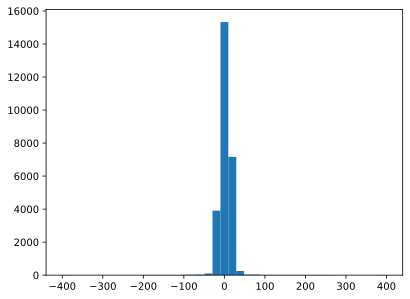

In [9]:
print(D.describe())
print(st.ttest_1samp(D, 0))
plt.hist(np.clip(D, -400, 400), bins=41);

In [10]:
#subset = np.random.choice(D, size=10000, replace=False)
subset = D
means = []
for i in range(10000):
    bootstrap = np.random.choice(subset, size=len(subset), replace=True)
    means.append(np.mean(bootstrap))
means = np.array(means)

[2.6763010053222946, 3.1583013010053222]


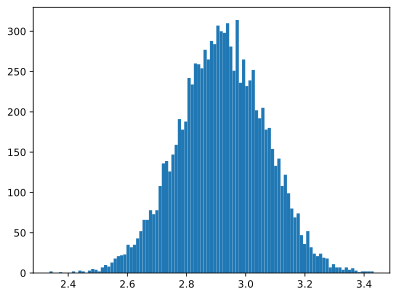

In [11]:
print([np.quantile(means, 0.05), np.quantile(means, 0.95)])
plt.hist(means, bins=101);